102
102
102
102


102
102


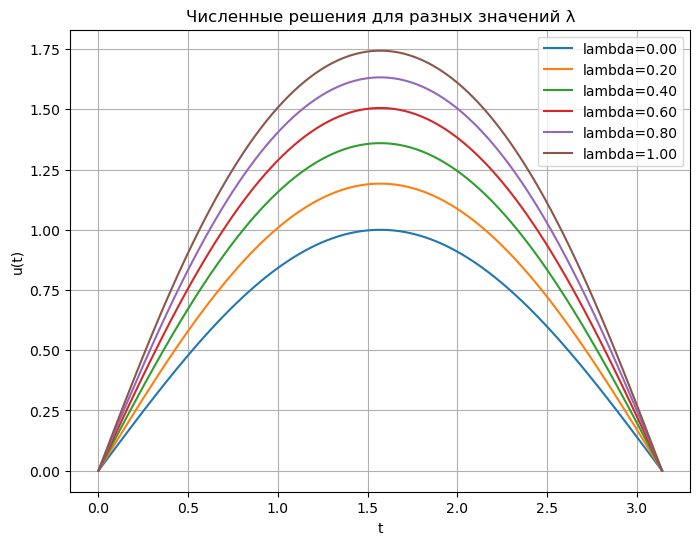

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def C_k(h, t):
    return 1 + np.sin(t) - 2/h**2 

def solve_nonlinear_bvp(N=100, lambda_max=1.0, delta_lambda=0.2, tol=1e-6, max_iter=100):
    a, b = 0, np.pi  # Границы области
    h = (b - a) / (N+1)  # Шаг сетки
    t = np.linspace(a, b, N+2)  # Включаем границы
    A = 1/h**2
    lambda_values = np.arange(0, lambda_max + delta_lambda, delta_lambda)
    
    solutions = {}  # Хранение решений

    for lambda_ in lambda_values:
        u = np.sin(t)  # Начальное приближение
        print(len(u))

        for _ in range(max_iter):
            F = np.zeros(N)
            dF = np.zeros((N, N))
            
            # Формируем систему уравнений для внутренних узлов
            for k in range(1, N+1):
                C = C_k(h, t[k])
                F[k-1] = A*u[k-1] + C*u[k] - u[k]**2 + A*u[k+1] + lambda_*np.sin(u[k])
                
                if k > 1:
                    dF[k-1, k-2] = A  # Левый сосед
                dF[k-1, k-1] = C - 2*u[k] + lambda_*np.cos(u[k])  # Центр
                if k < N:
                    dF[k-1, k] = A  # Правый сосед
            
            # Решаем систему методом Ньютона
            try:
                v = np.linalg.solve(dF, -F)
            except np.linalg.LinAlgError:
                print(f"Ошибка: матрица Якоби сингулярна для lambda={lambda_}")
                break

            u[1:N+1] += v  # Обновляем только внутренние точки
            
            if np.linalg.norm(v, np.inf) < tol:
                break
        
        solutions[lambda_] = u.copy()
    
    return t, solutions

# Решение задачи
t, solutions = solve_nonlinear_bvp()

# График решений
plt.figure(figsize=(8, 6))
for lambda_, u in solutions.items():
    plt.plot(t, u, label=f'lambda={lambda_:.2f}')
    
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Численные решения для разных значений λ')
plt.legend()
plt.grid()
plt.show()